<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Estatística Descritiva em R
---

Aqui você vai compreender os conceitos de população e amostra, e o que é a estatística descritiva. Aprenderá o que são e como empregar medidas de centralidade (média, mediana) e medidas de dispersão (variância, desvios padrão, quartis) para caracterização de conjuntos de dados. Vai aprender também como identificar outliers dos dados e a explorar como duas variáveis podem estar relacionadas linearmente (covariância, correlação). E você aprender tudo isso aplicando esses conceitos a conjuntos de dados com R.

# Introdução

A estatística descritiva busca fornecer uma descrição útil de um grande número de dados a partir de medidas de centralidade e dispersão dos dados como média, mediana, variância, desvio padrão e quartis, frequencia de valores e moda, correlação e covariância.

Você, então, pode aplicar agora os seus conhecimentos de R para fazer essas estatísticas e entender melhor um conjunto de dados de interesse.

# Tipos de dados

Uma distinção importante que você precisa ter em mente ao explorar os dados é identificar que tipo de dado, ou a natureza do dado, que você está tratando. Podemos identificar dois grandes grupos de dados, os qualitativos e quantitativos, ou mais simplesmente dados numéricos e dados categóricos.

<br>
<br> 

| Dados quantitativos ou numéricos             | Exemplos                               |
|:---------------------------------------------|:---------------------------------------|
| discretos (contagens ou número inteiros)     | ex. número de casos de infecção        |
| contínuos (medidas numa escala contínua)     | ex. volume, área, peso, preços         |


| Dados qualitativos ou categóricos            | Exemplos                               |
|:---------------------------------------------|:---------------------------------------|
| nominais (categorias de dados)               | ex. sexo: masculino, feminino          |
| ordinais (categorias ordenadas)              | ex. salinidade: baixa, média, alta     |

<br>
<br> 

Identificar claramente essa natureza dos dados é muito importante pois, dependedo de sua natureza, o dado pode ter um tratamento diferente. Por exemplo, pense no atributo `sexo` em uma base de dados de clientes. Esse atributo pode aparecer codificado como 0=masculino e 1=feminino. Entretanto, mesmo apresentando os valores numéricos 0 e 1, trata-se de uma categoria, um valor nominal e, portanto, faz pouco sentido falarmos em média do atributo `sexo` ou ainda valores como min e max, por que também não há uma relação de ordem (do menor para o maior) entre esses valores. Assim, essa natureza do dado é determinante para você saber que estatísticas são aplicáveis àquele dado.

# Amostra X População

Outra característica importante que você deve ter em mente sobre a natureza dos dados é se os dados que você irá analisar são *amostras* de um conjunto de dados ou são a totalidade dos dados. Por exemplo, você pode ter todos os salários dos funcionários de uma empresa e obter média salarial, maior e menor salários etc. Mas você não poderá obter o salário de *todos* dos brasileiros e, certamente, trabalhará com amostras desses dados. Existem uma série de técnicas para tornar essas amostras confiáveis e para que possamos, a partir de uma amostra, inferir, por exemplo, a média de salário dos brasileiros. Assim, você deve ter em mente ao obter medidas como média ou desvio padrão se elas se referem a dados de uma amostra ou dados de toda a população de dados. Em alguns havendo inclusive uma diferença na forma de cálculo.

# Exploração inicial dos dados

Vamos empregar nesses exemplos o dataset `Cars93`, um dataset built-in do pacote `MASS`.
Significado ds dados, quantidade e linhas e colunas, tipos de dados.

In [10]:
library(MASS)
head(Cars93)
# help(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


Os comandos abaixo exploram características da estrutura dos dados como número de linhas, atributos e os tipos de dados.

In [2]:
# execute cada um dos comandos isoladamente

nrow(Cars93) # nr de linhas
ncol(Cars93) # nr de atributos ou colunas

[1] 93

[1] 27

Examinando estrutura e tipos de dados.

In [3]:
str(Cars93) # estrutura dos dados como exibido na área 'Environment' do RStudio

class(Cars93$Model) # tipo dos dados
class(Cars93$Price)

names(Cars93) # nome dos atributos

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

[1] "factor"

[1] "numeric"

[1] "Manufacturer"       "Model"              "Type"              
 [4] "Min.Price"          "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"        "AirBags"           
[10] "DriveTrain"         "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"                "Rev.per.mile"      
[16] "Man.trans.avail"    "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"          "Width"             
[22] "Turn.circle"        "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"             "Make"

### Selecionando linhas e colunas

Em geral a seleção de dados de interesse ocorre depois que você já tem uma ideia das variáveis e seus valores para efetuar a seleção. Os exemplos abaixo são, portanto, apenas para que você tenha mais exemplos de seleção de dados e se familiarize com a seleção de dados com dataframes em R. Lembre-se aqui da sintaxe dos dataframes:

```
dataframe [ linhas , colunas ]
```

#### Selecionando linhas de `Cars93`

In [4]:
head(Cars93[Cars93$Price < 20,])
head(Cars93[Cars93$Price < 20 & Cars93$Type == 'Small',])

myCars = Cars93[Cars93$Price < 20 & Cars93$Type == 'Small',]
head(myCars)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century
12,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,⋯,5,182,101,66,38,25.0,13,2490,USA,Chevrolet Cavalier
13,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,⋯,5,184,103,68,39,26.0,14,2785,USA,Chevrolet Corsica
14,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,⋯,4,193,101,74,43,25.0,13,3240,USA,Chevrolet Camaro
15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,⋯,6,198,108,71,40,28.5,16,3195,USA,Chevrolet Lumina


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,Front,⋯,5,174,98,66,32,26.5,11,2270,USA,Dodge Colt
24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,Front,⋯,5,172,97,67,38,26.5,13,2670,USA,Dodge Shadow
29,Eagle,Summit,Small,7.9,12.2,16.5,29,33,None,Front,⋯,5,174,98,66,36,26.5,11,2295,USA,Eagle Summit
31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,Front,⋯,4,141,90,63,33,26.0,12,1845,USA,Ford Festiva
32,Ford,Escort,Small,8.4,10.1,11.9,23,30,None,Front,⋯,5,171,98,67,36,28.0,12,2530,USA,Ford Escort


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,Front,⋯,5,174,98,66,32,26.5,11,2270,USA,Dodge Colt
24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,Front,⋯,5,172,97,67,38,26.5,13,2670,USA,Dodge Shadow
29,Eagle,Summit,Small,7.9,12.2,16.5,29,33,None,Front,⋯,5,174,98,66,36,26.5,11,2295,USA,Eagle Summit
31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,Front,⋯,4,141,90,63,33,26.0,12,1845,USA,Ford Festiva
32,Ford,Escort,Small,8.4,10.1,11.9,23,30,None,Front,⋯,5,171,98,67,36,28.0,12,2530,USA,Ford Escort


#### Selecionando colunas de `Cars93`

In [5]:
head(Cars93$Price)
head(Cars93[,c('Price','Type')])
head(Cars93[,c(3,5)])

myCars = Cars93[,c('Price','Type')]
head(myCars)

[1] 15.9 33.9 29.1 37.7 30.0 15.7

,Price,Type
,<dbl>,<fct>
1,15.9,Small
2,33.9,Midsize
3,29.1,Compact
4,37.7,Midsize
5,30.0,Midsize
6,15.7,Midsize


,Type,Price
,<fct>,<dbl>
1,Small,15.9
2,Midsize,33.9
3,Compact,29.1
4,Midsize,37.7
5,Midsize,30.0
6,Midsize,15.7


,Price,Type
,<dbl>,<fct>
1,15.9,Small
2,33.9,Midsize
3,29.1,Compact
4,37.7,Midsize
5,30.0,Midsize
6,15.7,Midsize


#### Selecionando conjuntos de dados de `Cars93`

In [6]:
myCars = Cars93[ Cars93$Price < 20 & Cars93$Type == 'Small', c('Price','Type','MPG.city')]
head(myCars)
nrow(myCars)

,Price,Type,MPG.city
,<dbl>,<fct>,<int>
1,15.9,Small,25
23,9.2,Small,29
24,11.3,Small,23
29,12.2,Small,29
31,7.4,Small,31
32,10.1,Small,23


[1] 21

# Estatísticas dos Valores

O quadro a seguir sumariza alguns comandos básicos de R empregados para se obter estatísticas dos dados.

<br>
<br> 

| Univariada     | Descrição                                 |
|----------------|-------------------------------------------|
| min(x)         | Mínimo elemento em x                      |
| max(x)         | Máximo elemento em x                      |
| range(x)       | Range (min to max) elementos em x         |
| length(x)      | número de elementos em x                  |
| mean(x)        | Média dos valores em x                    |
| median(x)      | Mediana dos valores em x                  |
| var(x)         | Variância dos elementos em x              |
| sd(x)          | Desvio padrão dos elementos em x          |
| quantile(x,p)  | O percentual p quartil dos elementos de x |
| table(x)       | Frequ~encias de valores de x              |

<br>
<br> 

| Multivariada   | Descrição                                 |
|----------------|-------------------------------------------|
| cor(x,y)       | Correlação entre os elementos x e y       |
| cov(x,y)       | cov(x,y) Covariance between x and y       |

<br>
<br> 

A análise univariada refere-se a estatísticas que explicam uma única variável enquanto a análise multivariada são estatísticas que buscam explorar a relação entre duas ou mais variáveis.

# Frequência de valores `table()`

Para dados categóricos uma característica importante é quantidade de instâncias (linhas ou registros) que aparecem de cada valor. Em estatística chamamos isso de **frequencia dos dados** e mais adiante vamos ampliar esse conceito para variáveis contínuas e estudar distribuições dos dados.

O comando `table()` em R pode ser empregado para exibir a frequência de valores de uma variável discreta (categórica ou numérica). No momento, você não precisa se preocupar com os comandos para exibir o gráfico aqui. Simplesmente estamos apresentando a informação da frequência dos valores de forma gráfica.


Compact   Large Midsize   Small  Sporty     Van 
     16      11      22      21      14       9 


    USA non-USA 
     48      45 

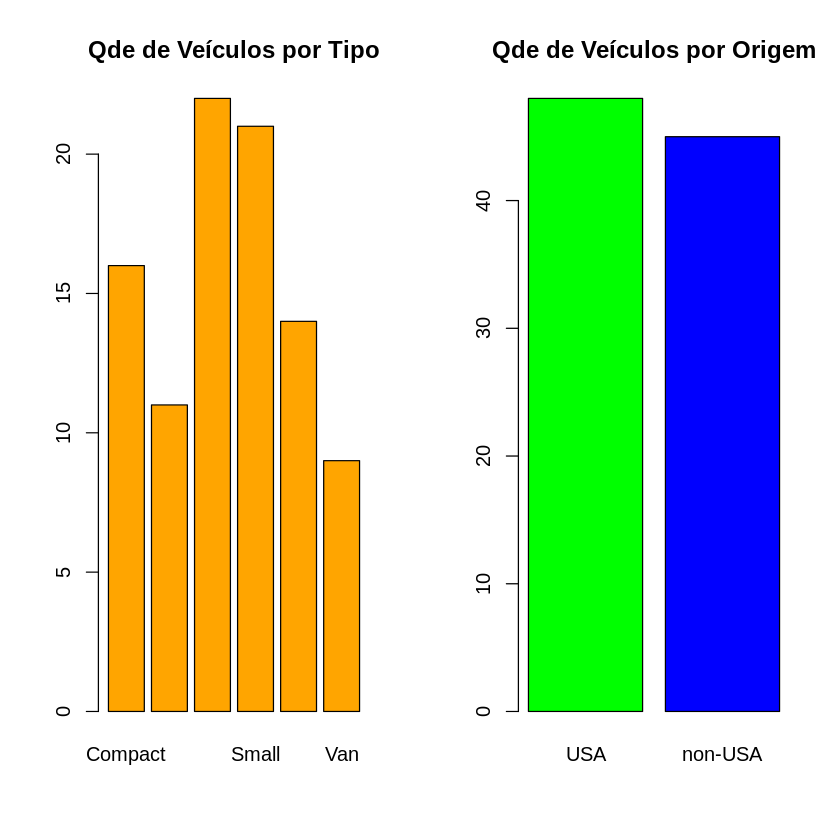

In [7]:
table(Cars93$Type)
table(Cars93$Origin)

par(mfrow = c(1, 2))
barplot(table(Cars93$Type), main='Qde de Veículos por Tipo',col='orange')
barplot(table(Cars93$Origin), main='Qde de Veículos por Origem',col=c('green','blue'))

# Medidas de Centralidade

Média, Mediana e Moda são as principais medidas de Centralidade ou medida de tendência central dos dados.

A **Média** é calculada somando-se todos os valores de um conjunto de dados e dividindo-se pelo número de elementos deste conjunto, resumidamente:

$$ \bar{x} = \frac{\sum_{i}^{n} x_i}{n} $$

A **Moda** é o valor mais frequente de um conjunto de dados, sendo assim, para defini-la basta observar a frequência com que os valores aparecem, e um conjunto de dados é chamado de bimodal quando apresenta dois valores igualmente mais frequentes. Não há um comando específico em R para a moda. Então, empregamos abaixo uma função para retornar a moda. Vários pacotes estatísticos, entretanto, implementam essa função e você pode, se quiser, empregar a função de algum pacote estatístico como o `DescTools`.

In [8]:
x = c(rep(1,2),rep(2,3),rep('a',5))
cat('x: ', x)

moda = names(table(x))[table(x)==max(table(x))]

cat('\nModa de x: ', moda)

x:  1 1 2 2 2 a a a a a
Moda de x:  a

Se você estiver empregando o Colab, a instalação do pacote pode ser bastante demorada... rs.

In [11]:
install.packages("DescTools")
library(DescTools)

cat('\nModa de x: ', Mode(x))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘BH’





Moda de x:  a

**Mediana** é definido como o valor central de um conjunto de dados. Para encontrar o valor da mediana os dados são colocados em ordem ordem crescente buscando-se assim o dados central (ou na posição de 50% dos dados, e isso será útil para você entender os quartis mais adiante). Quando o número elementos é par, a mediana é obtida pela média dos dois valores centrais. Note abaixo como se diferenciam os valores de média e mediana.

In [12]:
a = c(1,2,3,4,10)
b = c(1,2,3,10)
c = c(1,1,1,3,10)
cat('\nMediana de a: ', median(a), '\nMediana de b: ', median(b),  '\nMediana de c: ', median(c))
cat('\nMédia de a: ', mean(a), '\nMédia de b: ', mean(b),  '\nMédia de c: ', mean(c))


Mediana de a:  3 
Mediana de b:  2.5 
Mediana de c:  1
Média de a:  4 
Média de b:  4 
Média de c:  3.2

Existem outro tipos de média, como médias geométricas e médias harmônicas, mas que não trataremos aqui. Você deve notar ainda que as medidas de centralidade não se aplicam para valores categóricos pois sua natureza não inclui uma ideia de valor e ou necessariamente de ordem. O mesmo ocorre com as medidas de dispersão a seguir.

## Sensibilidade de Médias e Medianas

Em geral a média é uma boa medida para caracterizar dados mais uniformemente distribuídos sendo mais sensível que a mediana para dados na presença de *outliers*. *Outliers* são valores que  se diferenciam muito da maior parte dos dados. Por exemplo, imagine a média de renda dos alunos do nosso curso e imagine agora que Jeff Bezos venha a ser seu colega de turma. A média de renda dos alunos será bastante modificada, o valor da mediana, entretanto, tende a ficar pouco alterado.

In [13]:
a = c(rep(2000,5),rep(2500,4),rep(5000,2))
b = c(rep(2000,5),rep(2500,4),rep(5000,2),1000000000) # incluindo o outlier 'Jeff Bezos'

cat('\nMediana de a: ', median(a), '\nMediana de b: ', median(b))
cat('\nMédia de a: ', mean(a), '\nMédia de b: ', mean(b))


Mediana de a:  2500 
Mediana de b:  2500
Média de a:  2727.273 
Média de b:  83335833

# Medidas de Dispersão

Medidas de dispersão são usadas para determinar o grau de variabilidade dos dados de um conjunto de valores.
As estatísticas de tendência central (média, mediana, moda) não permite avaliar a homogeneidade ou uniformidade dos dados. O intervalo de valores (range), variância, desvio padrão e os quartis são as medidas de dispersão mais frequentemente usadas.

Inspecionar os valores min, max e o intervalo de valores é importante para quaisquer conjuntos de dados (mas lembre-se que essas medidas não se aplicam a dados categóricos).

In [14]:
min(myCars$Price)
max(myCars$Price)
range(myCars$Price)
max(myCars$Price) - min(myCars$Price) # chamamos essa diferença de amplitude total

[1] 7.4

[1] 15.9

[1]  7.4 15.9

[1] 8.5

## Variância e Desvio Padrão
A variação é uma medida numérica de como os valores dos dados estão dispersos em torno da média . Em particular, a variação da amostra é definida como:

$$  s^2(x) = \sum_i^n \frac{( x_i -  \bar{x})^2 }{n - 1} $$



Da mesma forma, a variância de uma população é definida em termos da média da população $\mu$ e tamanho da população N :

$$  \sigma^2(x) = \sum_i^n  \frac{( x_i -  \mu)^2 }{N} $$
Em R, a variação da amostra é calculada com a função `var()`. Observe que, quando o tamanho da amostra é  grande, a variância da amostra converge para a variância da população. Desse modo não faremos na maior parte dos casos distinção entre os cálculos de amostras e população, empregando diretamente as funções do R. Note ainda que, independente de uma ou outra forma de cálculo, a ordem do valor obtido é mantida e um valor maior de variância de amostra corresponde também a um maior valor de variância da população o que permite empregarmos quaisquer desses valores para identificar dados mais e menos dispersos. Mas se você precisar de uma variação da população poderá empregar o cálculo direto.

In [15]:
x = c(1,2,3,4)
var(x)

sum((x - mean(x))^2) / length(x)
sum((x - mean(x))^2) / (length(x) - 1) # este é o cálculo que corresponde a função var()

[1] 1.666667

[1] 1.25

[1] 1.666667

O desvio padrão, de uma amostra ou população, pode ser obtido pela raiz quadrada da correspondente variância. Assim,

$$  s(x) =  \sqrt{ \sum_i^n \frac{( x_i -  \bar{x})^2 }{n - 1}} $$
Ou simplesmente

$$  s(x) = \sqrt{ s^2(x) } $$
e, igualmente

$$  \sigma(x) =   \sqrt{  \sum_i^n  \frac{( x_i -  \mu)^2 }{N} } $$
ou

$$  \sigma(x) =   \sqrt{  \sigma^2(x)  } $$
Um valor alto para a variância (ou desvio padrão) indicará que os valores encontram-se mais distantes da média – ou seja, a distribuição é mais dispersa.

Você pode notar ainda que a variância emprega o quadrado da diferença dos valores com relação à média. Já o desvio padrão, como a raiz quadrada da variação, fornece um valor que está nas mesmas unidades que os valores o que será útil em uma série de situações que empream os dados originais. Em princípio, ambas medidas fornecem uma medida de dispersão, usando-se uma ou outra dependendo da necessidade.

In [16]:
suppressMessages(attach(Cars93))

mean(Price)

var(Price)
sd(Price)

cat(mean(Price) - sd(Price), mean(Price) + sd(Price))

detach(Cars93)

[1] 19.50968

[1] 93.30458

[1] 9.65943

9.850248 29.16911

O comando `attach` permite aqui omitir o nome do dataframe simplificando a codificação e o `sd()`, estando na mesma unidade da variável original, permite fazer operações como cálculo do intervalo acima.

## Escore padrão e *Outliers*

Outra medida de dispersão importante é o escore padronizado. Ele fornece uma medida de quanto um valor se desvia da média e é dado por:


$$  Z(x_i) =   \frac{ x_i -  \bar{x} }{s(x)} $$
Valores negativos indicam que o valor de $x_i$ encontra-se à esquerda da média e valores positivos indicam que o valor de $x_i$ encontra-se à direita da média.

Essa medida é útil para vários propósitos e aqui você pode empregá-la para detectar *outliers* dos dados, isto é, dados que se diferenciam demais da amostra. O escore padronizado pode ser obtido para os valores todos os valores dos dados aplicando-se a função `scale()`.

Neste exemplo calculamos o valor do escore padronizado para o preço do 5o veículo de nosso conjunto de dados Cars93.

In [17]:
suppressMessages(attach(Cars93))

cat('\nPreço do 5o veículo: ', Price[5])

cat('\nCálculo do escore padronizado (empregando a definição):', ( Price[5] - mean(Price) ) / sd(Price))

cat('\nCálculo do escore padronizado (empregando a função scale):', scale(Price)[5])

detach(Cars93)


Preço do 5o veículo:  30
Cálculo do escore padronizado (empregando a definição): 1.086019
Cálculo do escore padronizado (empregando a função scale): 1.086019

Outliers podem surgir por erros de medida, 'sujeira' nos dados ou serem medidas de fato que apenas desviam do padrão dos demais dados, e é importante você entender a natureza desses dados para tomar a decisão do que fazer com esses dados (por exemplo, excluir da amostra). Existem algumas técnicas para a detecção de outliers e uma delas é empregar escore padronizado. Valores com escore padrão superior a 3 são, então, considerados outliers. Note que muitas vezes você pode pensar que um determinado valor está *fora da curva*, mas o que define estatisticamente um valor fora do padrão dos dados é um cálculo bem definido, como por exemplo do escore padrão > 3. Assim, você deve notar que o preço do veículo acima, 30, com escore padrão de 1.08 é um preço dentro do padrão de dados. Veja mais sobre *outliers* na seção abaixo sobre Quartis.

Você pode, então, empregar a função `scale()` para determinar outliers nos dados.

In [18]:
suppressMessages(attach(Cars93))

scale(Price, center=FALSE)[1:6] # uma amostra dos escores padrão

L = scale(Price) > 3 # selecionando escores maiores que 3

print(Cars93[L,])

detach(Cars93)

[1] 0.7271963 1.5504374 1.3309065 1.7242328 1.3720685 0.7180492

    Manufacturer Model    Type Min.Price Price Max.Price MPG.city MPG.highway
59 Mercedes-Benz  300E Midsize      43.8  61.9        80       19          25
              AirBags DriveTrain Cylinders EngineSize Horsepower  RPM
59 Driver & Passenger       Rear         6        3.2        217 5500
   Rev.per.mile Man.trans.avail Fuel.tank.capacity Passengers Length Wheelbase
59         2220              No               18.5          5    187       110
   Width Turn.circle Rear.seat.room Luggage.room Weight  Origin
59    69          37             27           15   3525 non-USA
                 Make
59 Mercedes-Benz 300E


<small>
No código acima empregamos as funções `attach` e `detach` que permitem associar um dataframe e referenciarmos diretamente os atributos. Uma boa técnica para simplificar a programação, mas você pode claramente programar e sobreviver sem ela ;-).

Não é supresa que um Mercedes-Benz seja o veículo com preço outlier, sendo 61.9 o único preço outlier desse conjunto de dados.

## Interpretando o Escore Padrão

Você aprenderá mais sobre isso e os comandos abaixo nas aulas seguintes. Mas neste ponto, talvez seja importante você notar que em dados com uma distribuição normal, aquela com uma curva em forma de sino e que inclui um grande número de casos de interesse, é esperado que 68% dos dados estejam dentro de 1 desvio padrão da média, 95% dos dados dentro de 2 desvios padrão da média e 99,7% dos dados dentro de 3 desvios padrão da média.

$$[ \bar{x} - 1\sigma(x), \bar{x} + 1\sigma(x)] \rightarrow 68\% \ dos \ dados$$
$$[ \bar{x} - 2\sigma(x), \bar{x} + 2\sigma(x)] \rightarrow 95\% \ dos \ dados$$

$$[ \bar{x} - 3\sigma(x), \bar{x} + 3\sigma(x)] \rightarrow 99.7\% \ dos \ dados$$
Os comandos `pnorm` e `qnorm` que você aprenderá quando estudarmos a distribuição normal são empregados para obter respectivamente o 'percentil' dos dados a partir de um valor (`pnorm`) ou o valor para um dado percentil (`qnorm`), e você pode notar que o preço do quinto veículo corresponde a um percentil inferior a 99.7% (e portanto um valor esperado), enquanto o preço do modelo Mercedez aparece  encontra-se em percentil 99.9%, e portanto fora do intervalo de 99.7%, caracterizando um outlier.

In [19]:
suppressMessages(attach(Cars93))

Price[5] # um preço normal
pnorm(Price[5],mean=mean(Price),sd=sd(Price))
qnorm(pnorm(Cars93$Price[5],mean=mean(Price),sd=sd(Price)),mean=mean(Price),sd=sd(Price))

Price[59] # um outlier
pnorm(Price[59],mean=mean(Price),sd=sd(Price))
qnorm(pnorm(Cars93$Price[59],mean=mean(Price),sd=sd(Price)),mean=mean(Price),sd=sd(Price))

detach(Cars93)

[1] 30

[1] 0.8612647

[1] 30

[1] 61.9

[1] 0.9999943

[1] 61.9

A figura a seguir mostra como estão relacionados esses intervalos às quantidades de ocorrências da amostra para uma distribuição normal introduzindo também o conceito de quartis e distância inter quartis que você verá a seguir.

<img src="http://meusite.mackenzie.br/rogerio/TIC/boxplotIQR.png" width=500, align="center">

# Quartis

O percentil é o valor que corresponde a um certo percentual dos dados da amostra quando encontram-se ordenados. Desse modo, os percentis 0%, 50% e 100% correspondem, respectivamente, ao valor mímino, a mediana e o valor máximo dos dados.

In [20]:
suppressMessages(attach(Cars93))

cat('\n',min(Price), quantile(Price,prob=0))
cat('\n',median(Price), quantile(Price,prob=0.5))
cat('\n',max(Price), quantile(Price,prob=1))

detach(Cars93)


 7.4 7.4
 17.7 17.7
 61.9 61.9

E os quartis, os valores que correspondem a 0, 0.25, 0.5, 0.75 e 1 do percentual ordenado das amostras, pela sua importância, acabam recebendo denominação próprias. Os valores correspondentes a 25% e 75% dos dados são chamados de 1º e 3º quartis, e os demais mínimo (0), mediana (0.5) e máximo (1).

In [21]:
print(quantile(Cars93$Price))

  0%  25%  50%  75% 100% 
 7.4 12.2 17.7 23.3 61.9 


Esses dados também podem ser obtidos com o comando `summary()` que apresenta um conjunto de estatísticas resumidas dos dados.

In [22]:
summary(Cars93[ , c('Type','Make','Price','Cylinders','Horsepower')])

      Type               Make        Price        Cylinders    Horsepower   
 Compact:16   Acura Integra: 1   Min.   : 7.40   3     : 3   Min.   : 55.0  
 Large  :11   Acura Legend : 1   1st Qu.:12.20   4     :49   1st Qu.:103.0  
 Midsize:22   Audi 100     : 1   Median :17.70   5     : 2   Median :140.0  
 Small  :21   Audi 90      : 1   Mean   :19.51   6     :31   Mean   :143.8  
 Sporty :14   BMW 535i     : 1   3rd Qu.:23.30   8     : 7   3rd Qu.:170.0  
 Van    : 9   Buick Century: 1   Max.   :61.90   rotary: 1   Max.   :300.0  
              (Other)      :87                                              

Um gráfico de caixa, ou `boxplot` é um gráfico que representa esses valores. Você aprenderá na próxima aula como produzir esses gráficos e, por hora, basta observar como esses valores são representados.

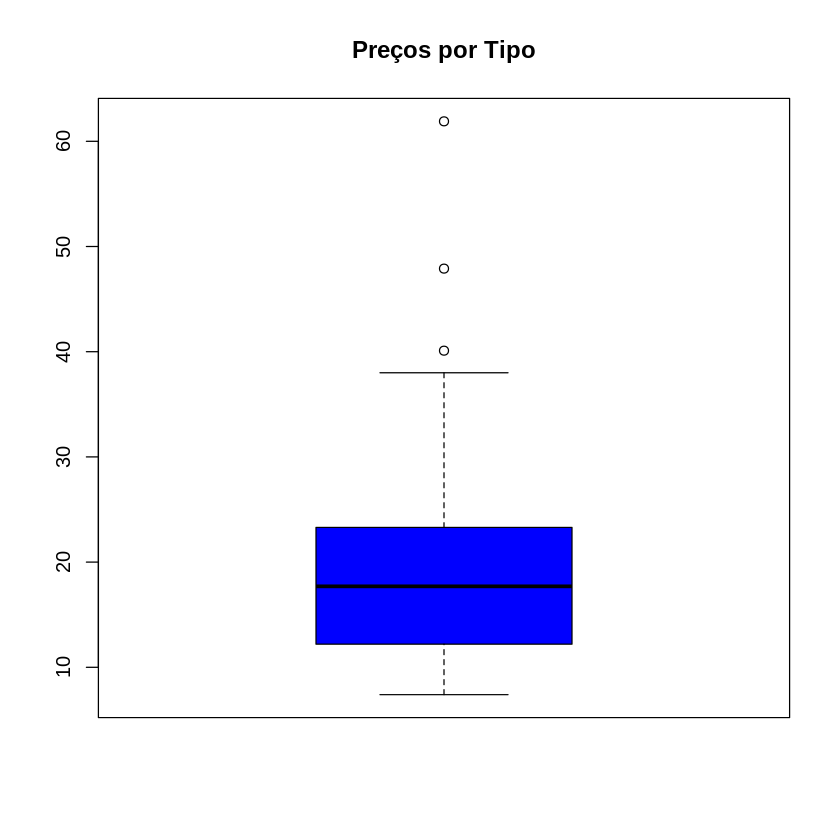

In [23]:
suppressMessages(attach(Cars93))

boxplot(Price,data=Cars93,main="Preços por Tipo",col='Blue')

detach(Cars93)

## Distância interquartis e Outliers

Os quartis oferecem uma outra técnica para detecção de outliers e, embora aqui apresentem outliers diferentes, em geral a técnica do escore padrão e das distâncias interquartis tendem a convergir para uma grande quantidade de dados. A técnica interquartis, entretanto, é mais comum e é a que empregaremos aqui.

Nessa técnica (veja a figura anterior) são considerados outliers os dados que ultrapassam a distância de $1.5 \times IQR$, a distância entre o 3o e o 1o quartil.

In [24]:
iqr = IQR(Cars93$Price)

# ou ainda...
#
# Q1 = quantile(Cars93$Price, probs=c(.25))
# Q3 = quantile(Cars93$Price, probs=c(.75))
# iqr = Q3 - Q1

print(Cars93[ (Cars93$Price > quantile(Cars93$Price, probs=c(.75)) + 1.5*iqr) | (Cars93$Price < quantile(Cars93$Price, probs=c(.25)) - 1.5*iqr), ])

    Manufacturer   Model    Type Min.Price Price Max.Price MPG.city MPG.highway
11      Cadillac Seville Midsize      37.5  40.1      42.7       16          25
48      Infiniti     Q45 Midsize      45.4  47.9      50.4       17          22
59 Mercedes-Benz    300E Midsize      43.8  61.9      80.0       19          25
              AirBags DriveTrain Cylinders EngineSize Horsepower  RPM
11 Driver & Passenger      Front         8        4.6        295 6000
48        Driver only       Rear         8        4.5        278 6000
59 Driver & Passenger       Rear         6        3.2        217 5500
   Rev.per.mile Man.trans.avail Fuel.tank.capacity Passengers Length Wheelbase
11         1985              No               20.0          5    204       111
48         1955              No               22.5          5    200       113
59         2220              No               18.5          5    187       110
   Width Turn.circle Rear.seat.room Luggage.room Weight  Origin
11    74          44

# Covariância e Correlação

Entendidas as características de uma variável isolada do nosso conjunto de dados (por exemplo o Preço dos veículos), estamos interessados agora em compreender como se relacionam duas variáveis de interesse. Por exemplo, você pode estar interessado em saber o preço de um veículo se relaciona com o consumo de combustível.

A Covariância mede a relação linear entre duas variáveis. A covariância é semelhante à correlação entre duas variáveis, no entanto, elas diferem nas seguintes maneiras:

1. Coeficientes de correlação são normalizados, sendo um valor no intervalo entre $[-1, 1]$ onde, um relacionamento linear perfeito resulta em um coeficiente de correlação $|1|$. Ele mede tanto a força (valor absoluto) como a direção da relação linear entre duas variáveis (positivo para mesma direção).

2. 2.	Valores de covariância podem variar de menos infinito a mais infinito e, portanto, o valor para uma relação linear ideal dependerá dos dados. Assim, é difícil determinar a força da relação entre as variáveis. De qualquer modo, valores de covariância positivos indicam que valores acima da média de uma variável estão associados, também, a valores acima da média da segunda variável. E de modo equivalente, valores negativos de covariância indicam que valores acima da média de uma variável associam-se a valores abaixo da média para segunda variável.

Embora represente uma relação linear entre os dados a correlação é uma relação bastante importante e, em geral, a primeira que buscamos. Mas você deve saber que dados podem estar bastante relacionados sem que, entretanto, exibam uma relação linear.

In [25]:
x = c(1:100)
y = sin(x)*x
cor(x,y)

[1] -0.04414844

Nos dados acima $x$ e $y$ têm uma dependência direta e, entretanto, exibem uma correlação próxima de zero.

Além disso você correlação não significa necessariamente uma relação de causa efeito. Ela pode ser um indício dessa relação, mas em princípio, ela apenas indica o quanto os valores esperados de uma variável estão relacionados ao valor da outra. Duas variáveis, entretanto, podem apresentar correlação sem uma relação de causa efeito entre elas, mas por que ambas são o resultado de uma terceira variável.

O coeficiente de correlação é uma função direta da covariância e obtido pela divisão da covariância pelo produto dos desvios padrão das variáveis.

A covariância de uma amostra é definida como:

$$ s_{xy} = COV(x,y) =\frac{1}{n-1} \sum_{i}^{n}  (x_i - \bar{x})(y_i - \bar{y}) $$
e, da mesma forma, a covariância populacional é dada por:

$$ \sigma_{xy} = COV(x,y) = \frac{1}{n} \sum_{i}^{n} (x_i - \mu_{x})(y_i - \mu_{y}) $$
e talvez você tenha notado a semelhança dos cálculos de covariância e variância de uma única variável. A variância sendo idêntica a covariância de uma variável com ela mesma.

O **coeficiente de determinação**, ou mais exatamente o **coeficiente de determinação de Pearson** pode ser então calculado como:

$$ r_{xy} = \frac{COV(x,y)}{\sigma(x) \sigma(y)} $$
E empregamos as funções `cov()` e `cor()` para obter esses valores com R.

In [26]:
cov(Cars93$Price, Cars93$Horsepower)
cor(Cars93$Price, Cars93$Horsepower)

cov(Cars93$Price, Cars93$MPG.city)
cor(Cars93$Price, Cars93$MPG.city)

[1] 398.7647

[1] 0.7882176

[1] -32.27532

[1] -0.5945622

E não ver ser surpresa para você que o preço dos veículos tenha uma correlação positiva para potência dos motores (isto é, carros mais potentes são mais caros) e uma correlação negativa para o maior consumo de combustível (note que MPG, ou *Milhas por Galão* tem valores menores para um maior consumo de combustível).

Você pode observar a relação de duas variáveis graficamente e exploraremos mais isso na próxima aula.

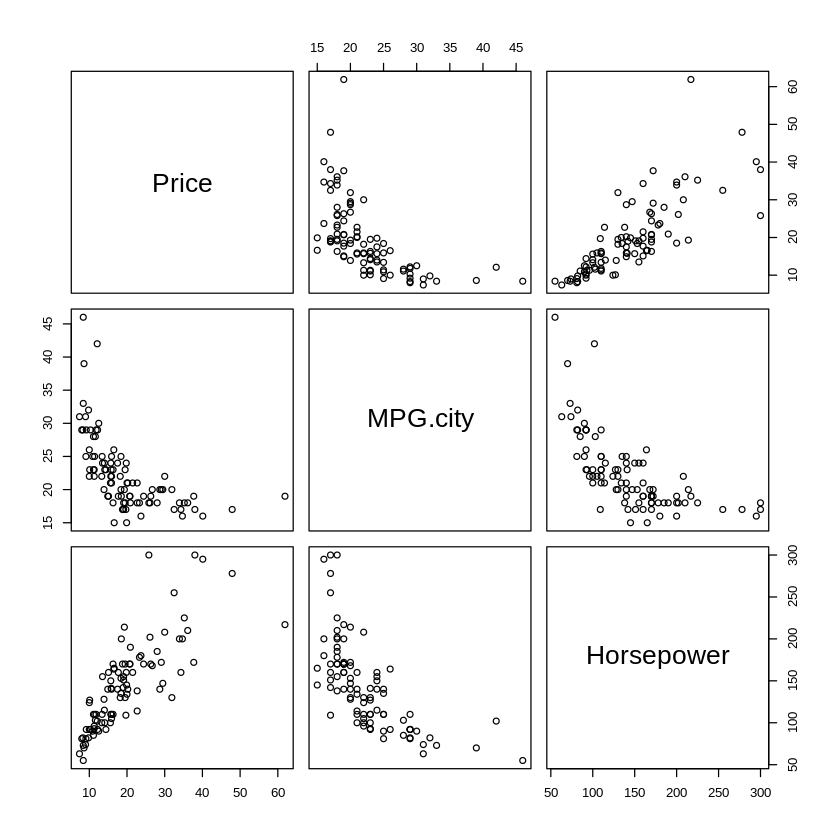

In [27]:
myCars = Cars93[ , c('Price',"MPG.city", 'Horsepower')]
pairs(myCars)

# Para Saber Mais

1. Acesse Navarro, Danielle, **Learning Statistics with R**, Chapter 5: Descriptive statistics em https://learningstatisticswithr.com/book/. Você vai aprender mais sobre estatística descritiva e como empregar o R para fazer suas análises. Se quiser ir mais fundo tente entender o que é **Kurtosis** e **Skewness**, medidas descritivas que não tratamos aqui.

1. Quer fazer uma breve revisão do que é a Estatística Descritiva e seu propósito? Acesse **Descriptive Statistics** em https://www.investopedia.com/terms/d/descriptive_statistics.asp (se precisar empregue o Google translator na página). Depois de ler o texto, será que você saberia dizer a diferença entre **Estatística Descritiva e Inferencial**?

1. Mais uma revisão de conceitos de Estatística Descritiva? Assista ao vídeo **Introdução à Estatística Descritiva** em https://youtu.be/pnpq0w7d5Mw. São menos de 10min e você vai revisar conceitos bastante importantes.


# Referências

1. Devore, Jay L. **Probabilidade e Estatística para Engenharia e Ciências**. Trad. Solange Aparecida Visconte. Cengage, 2018.

2. Navarro, Danielle, **Learning Statistics with R**, disponível em: https://learningstatisticswithr.com/ ( LSR version 0.6 (pdf) ) ou ainda em https://learningstatisticswithr.com/book/. Acesso: 26/02/2021.

3. Wickham, H., Grolemund, G. **R for Data Science**. O'Reilly Media, Inc., 2016.